In [1]:
import os, sys
import numpy as np
import pickle
import matplotlib.pyplot as plt

plt.rcParams["font.size"] = "12"
plt.rcParams["lines.linewidth"] = 2
plt.rcParams["lines.markersize"] = 4
plt.rcParams["lines.markeredgewidth"] = 2
plt.rcParams["font.family"] = "serif"

In [2]:
all_sinr = np.arange(-30, 0.1, 3)


def compute_mse_score(mse_mean):
    return np.mean(np.maximum(mse_mean, -50))


def compute_ber_score(ber_mean, ber_thr=1e-2):
    sinr_level = 3
    for i in range(len(all_sinr), 0, -1):
        if ber_mean[i - 1] <= ber_thr:
            sinr_level = all_sinr[i - 1]
        else:
            break
    return sinr_level

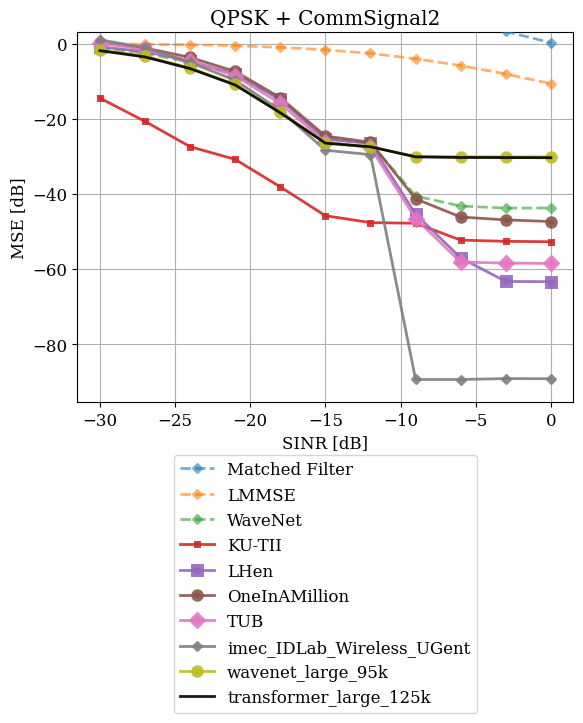

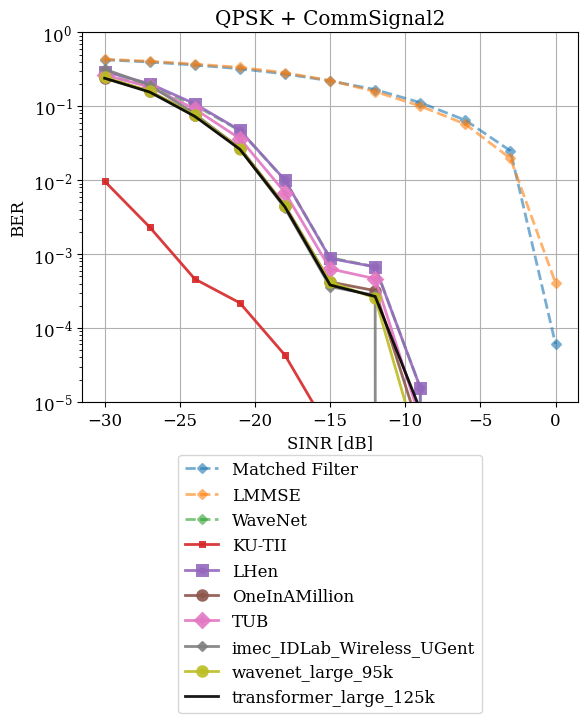

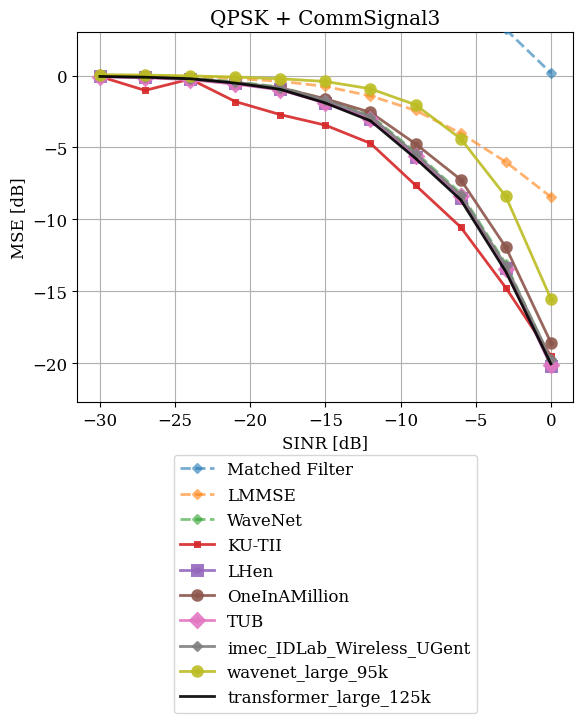

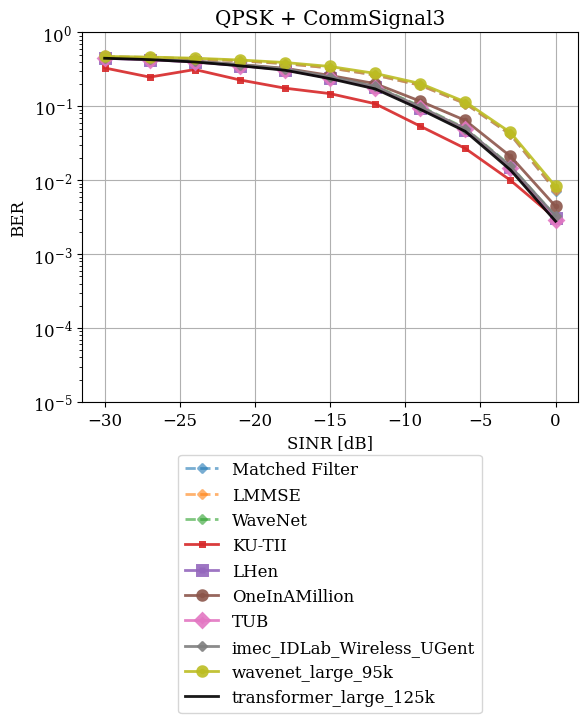

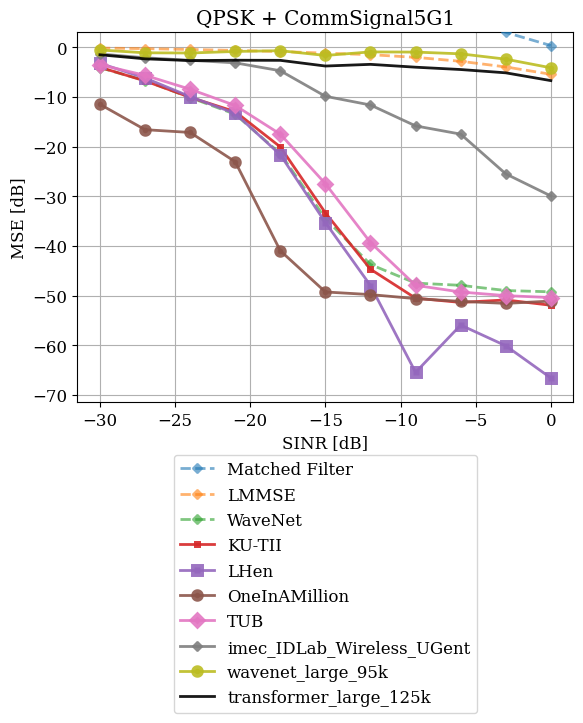

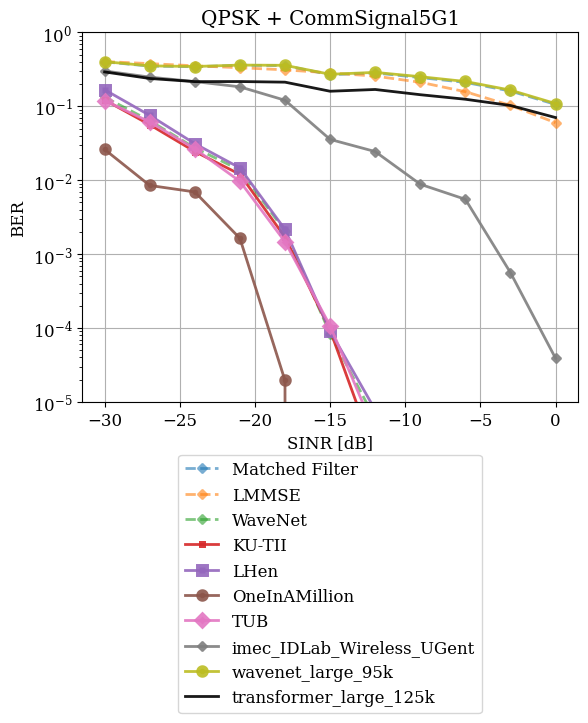

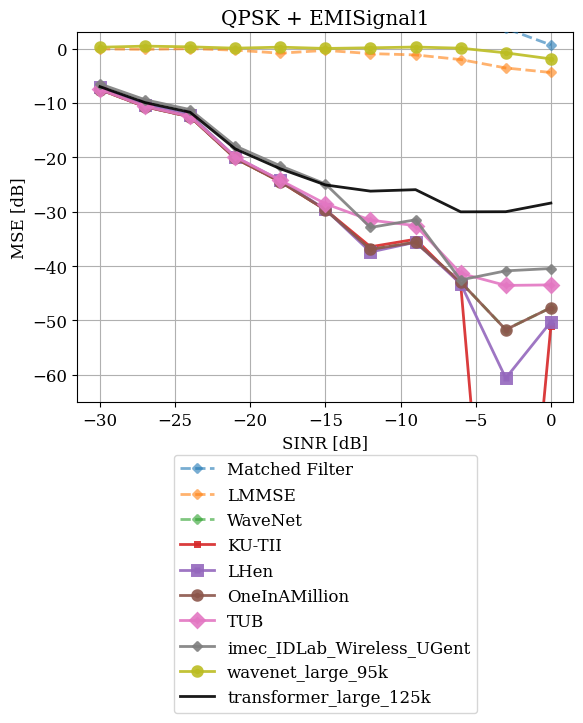

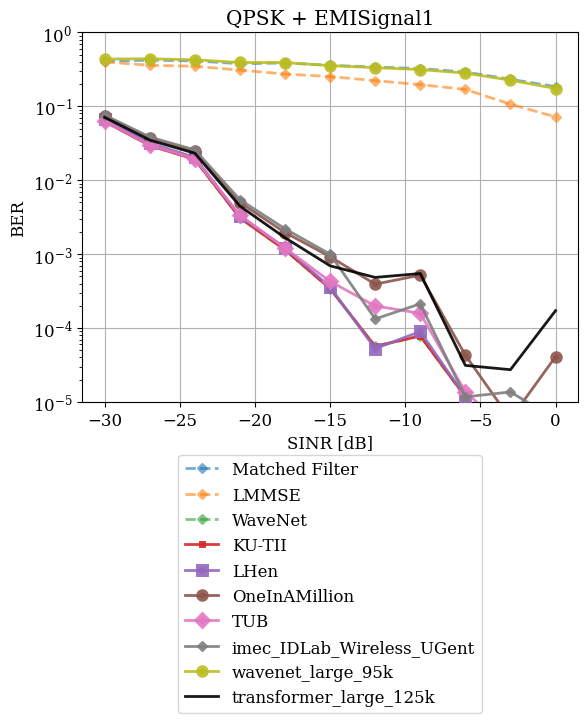

In [16]:
testset_identifier = "TestSet2Mixture"

all_methods_string = [
    # Baseline synchronized methods
    "Default_NoMitigation",
    "Default_LMMSE",
    "Default_Torch_WaveNet",
    "KU-TII",
    "LHen",
    "OneInAMillion",
    "TUB",
    "imec_IDLab_Wireless_UGent",
    # New wavenet-based methods
    "wavenet_large_95k",
    # Transformer-based reference methods
    "transformer_large_125k",
    # "transformer_large_130k",
    # "transformer_large_135k",
    # "transformer_large_140k",
    # "transformer_large_145k",
    # "transformer_large_150k",
    # "transformer_large_155k",
    # "transformer_large_160k",
    # "transformer_large_165k",
    # "transformer_large_170k",
    # "transformer_large_175k",
    # "transformer_large_180k",
]

label_dict = {
    # Baseline synchronized methods
    "Default_NoMitigation": "Matched Filter",
    "Default_LMMSE": "LMMSE",
    "Default_Torch_WaveNet": "WaveNet",
    "KU-TII": "KU-TII",
    "LHen": "LHen",
    "OneInAMillion": "OneInAMillion",
    "TUB": "TUB",
    "imec_IDLab_Wireless_UGent": "imec_IDLab_Wireless_UGent",
    # New wavenet-based methods
    "wavenet_large_95k": "wavenet_large_95k",
    # Transformer-based reference methods
    "transformer_large_125k": "transformer_large_125k",
    # "transformer_large_130k": "transformer_large_130k",
    # "transformer_large_135k": "transformer_large_135k",
    # "transformer_large_140k": "transformer_large_140k",
    # "transformer_large_145k": "transformer_large_145k",
    # "transformer_large_150k": "transformer_large_150k",
    # "transformer_large_155k": "transformer_large_155k",
    # "transformer_large_160k": "transformer_large_160k",
    # "transformer_large_165k": "transformer_large_165k",
    # "transformer_large_170k": "transformer_large_170k",
    # "transformer_large_175k": "transformer_large_175k",
    # "transformer_large_180k": "transformer_large_180k",
}

marker_dict = {
    # Baseline synchronized methods
    "Default_NoMitigation": "",
    "Default_LMMSE": "",
    "Default_Torch_WaveNet": "",
    "KU-TII": "+",
    "LHen": "s",
    "OneInAMillion": "o",
    "TUB": "D",
    "imec_IDLab_Wireless_UGent": "x",
    # New wavenet-based methods
    "wavenet_large_95k": "o",
    # Transformer-based reference methods
    "transformer_large_125k": "k",
    # "transformer_large_130k": "",
    # "transformer_large_135k": "",
    # "transformer_large_140k": "",
    # "transformer_large_145k": "",
    # "transformer_large_150k": "",
    # "transformer_large_155k": "",
    # "transformer_large_160k": "",
    # "transformer_large_165k": "",
    # "transformer_large_170k": "",
    # "transformer_large_175k": "",
    # "transformer_large_180k": "",
}

if not os.path.exists("/home/tejasj/data2/RF_transformer/eval_outputs/figures"):
    os.makedirs("/home/tejasj/data2/RF_transformer/eval_outputs/figures")

for soi_type in ["QPSK"]:
    for interference_sig_type in ["CommSignal2", "CommSignal3", "CommSignal5G1", "EMISignal1"]:
        mse_to_plot, ber_to_plot = {}, {}
        for id_string in all_methods_string:
            try:
                mse_mean, ber_mean = pickle.load(
                    open(
                        os.path.join(
                            "/home/tejasj/data2/RF_transformer/eval_outputs/ICASSP_baselines",
                            f"{id_string}",
                            f"{id_string}_{testset_identifier}_exports_summary_"
                            f"{soi_type}_{interference_sig_type}.pkl",
                        ),
                        "rb",
                    )
                )
            except FileNotFoundError:
                mse_mean, ber_mean = pickle.load(
                    open(
                        os.path.join(
                            "/home/tejasj/data2/RF_transformer/eval_outputs/synchronized/results",
                            f"{id_string}_{testset_identifier}_exports_summary_"
                            f"{soi_type}_{interference_sig_type}.pkl",
                        ),
                        "rb",
                    )
                )
            mse_to_plot[id_string] = mse_mean
            ber_to_plot[id_string] = ber_mean

        plt.figure()
        for id_str in mse_to_plot.keys():
            marker_style = "x--" if "Default" in id_str else marker_dict[id_str] + "-"
            plt.plot(
                all_sinr,
                mse_to_plot[id_str],
                marker_style,
                label=label_dict[id_str],
                alpha=0.6 if "Default" in id_str else 0.9,
                ms=4,
                mew=5,
                zorder=90,
            )
        plt.legend(loc="upper center", bbox_to_anchor=(0.5, -0.12))
        plt.grid()
        plt.gca().set_ylim(top=3)
        if soi_type == "QPSK" and interference_sig_type == "EMISignal1":
            plt.gca().set_ylim(bottom=-65)
        plt.xlabel("SINR [dB]")
        plt.ylabel("MSE [dB]")
        plt.title(f"{soi_type} + {interference_sig_type}")

        # plt.savefig(
        #     os.path.join(
        #         "/home/tejasj/data2/RF_transformer/eval_outputs/figures",
        #         f"collated_MSE_{soi_type}_{interference_sig_type}_Comparison.png",
        #     ),
        #     dpi=300,
        #     bbox_inches="tight",
        # )

        plt.figure()
        for id_str in ber_to_plot.keys():
            marker_style = "x--" if "Default" in id_str else marker_dict[id_str] + "-"
            plt.semilogy(
                all_sinr,
                ber_to_plot[id_str],
                marker_style,
                label=label_dict[id_str],
                alpha=0.6 if "Default" in id_str else 0.9,
                ms=4,
                mew=5,
                zorder=90,
            )
        plt.legend(loc="upper center", bbox_to_anchor=(0.5, -0.12))
        plt.grid()
        plt.ylim([1e-5, 1])
        plt.xlabel("SINR [dB]")
        plt.ylabel("BER")
        plt.title(f"{soi_type} + {interference_sig_type}")

        # plt.savefig(
        #     os.path.join(
        #         "/home/tejasj/data2/RF_transformer/eval_outputs/figures",
        #         f"collated_BER_{soi_type}_{interference_sig_type}_Comparison.png",
        #     ),
        #     dpi=300,
        #     bbox_inches="tight",
        # )

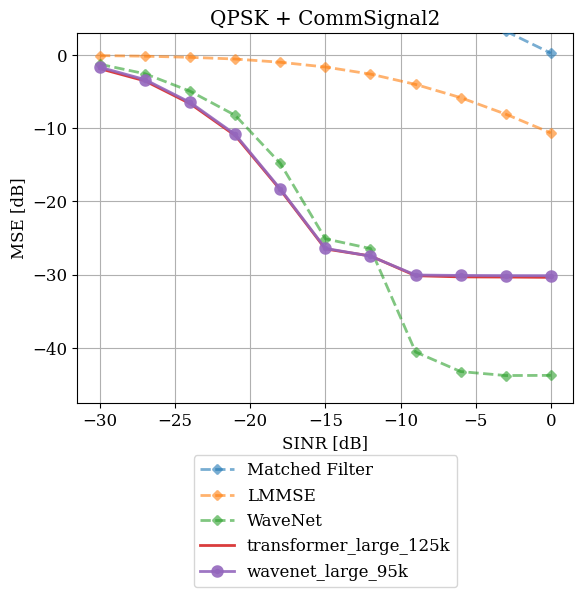

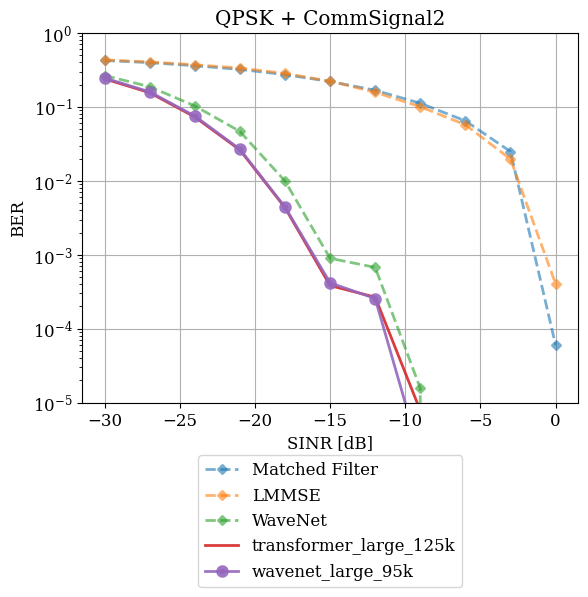

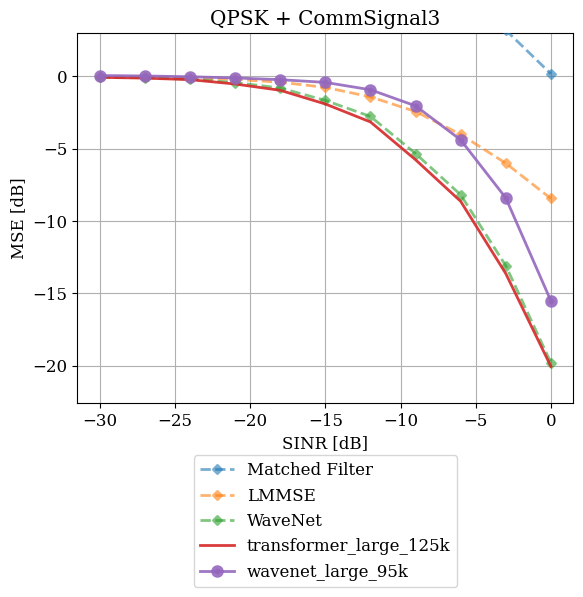

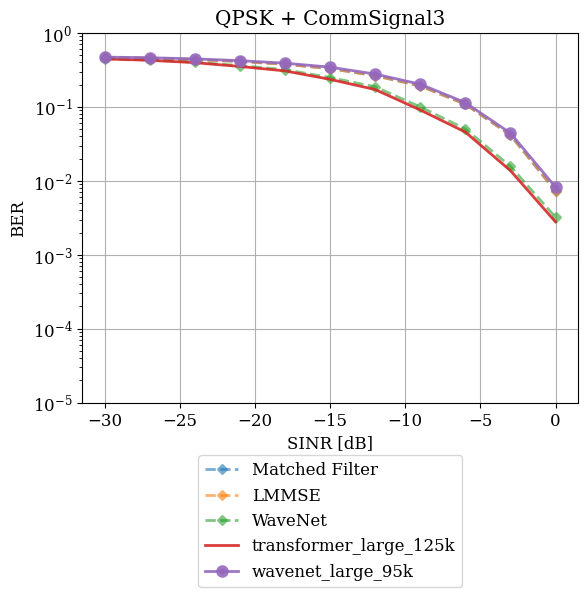

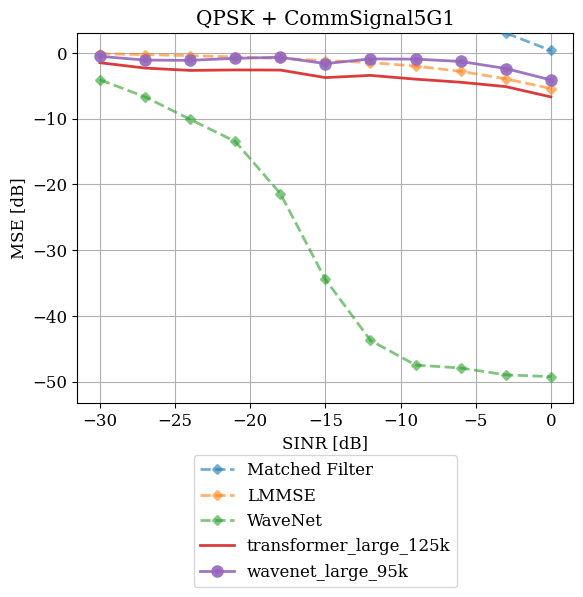

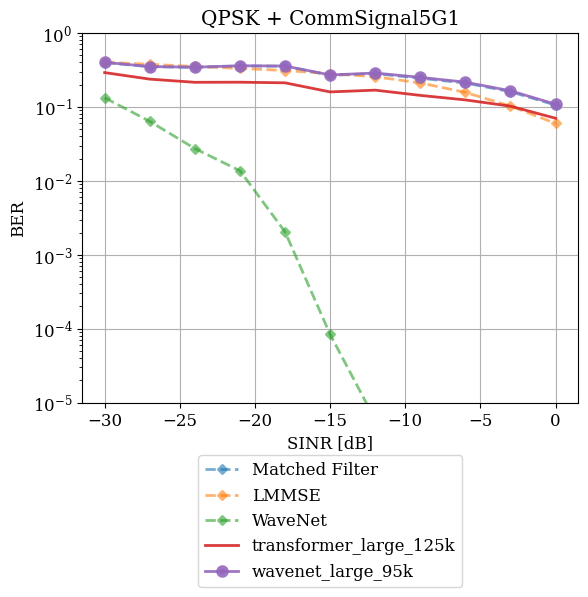

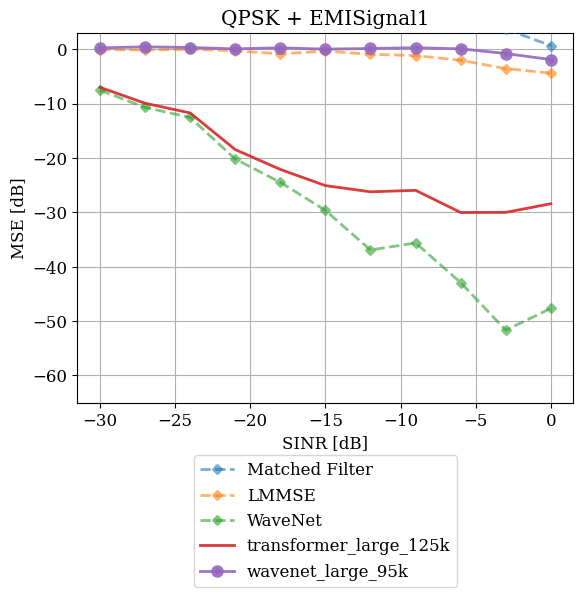

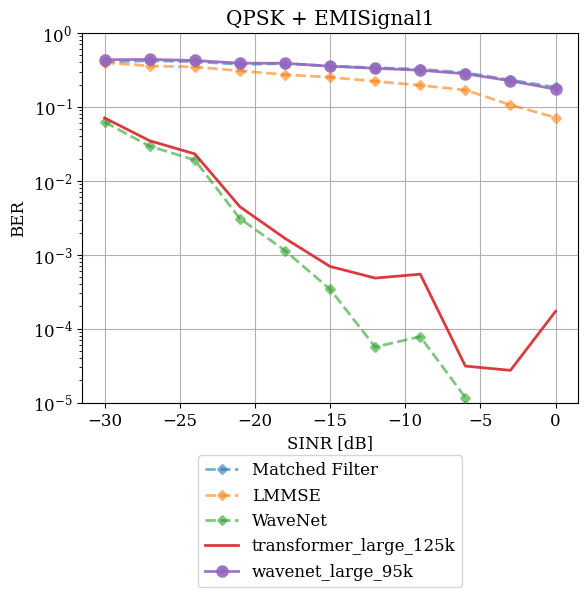

In [13]:
testset_identifier = "TestSet2Mixture"

all_methods_string = [
    # Baseline synchronized methods
    "Default_NoMitigation",
    "Default_LMMSE",
    "Default_Torch_WaveNet",
    # Transformer-based reference methods
    "transformer_large_125k",
    # "transformer_large_130k",
    # "transformer_large_135k",
    # "transformer_large_140k",
    # "transformer_large_145k",
    # "transformer_large_150k",
    # "transformer_large_155k",
    # "transformer_large_160k",
    # "transformer_large_165k",
    # "transformer_large_170k",
    # "transformer_large_175k",
    # "transformer_large_180k",
    "wavenet_large_95k",
]

label_dict = {
    # Baseline synchronized methods
    "Default_NoMitigation": "Matched Filter",
    "Default_LMMSE": "LMMSE",
    "Default_Torch_WaveNet": "WaveNet",
    # Transformer-based reference methods
    "transformer_large_125k": "transformer_large_125k",
    # "transformer_large_130k": "transformer_large_130k",
    # "transformer_large_135k": "transformer_large_135k",
    # "transformer_large_140k": "transformer_large_140k",
    # "transformer_large_145k": "transformer_large_145k",
    # "transformer_large_150k": "transformer_large_150k",
    # "transformer_large_155k": "transformer_large_155k",
    # "transformer_large_160k": "transformer_large_160k",
    # "transformer_large_165k": "transformer_large_165k",
    # "transformer_large_170k": "transformer_large_170k",
    # "transformer_large_175k": "transformer_large_175k",
    # "transformer_large_180k": "transformer_large_180k",
    "wavenet_large_95k": "wavenet_large_95k",
}

marker_dict = {
    # Baseline synchronized methods
    "Default_NoMitigation": "",
    "Default_LMMSE": "",
    "Default_Torch_WaveNet": "",
    # Transformer-based reference methods
    "transformer_large_125k": "",
    # "transformer_large_130k": "",
    # "transformer_large_135k": "",
    # "transformer_large_140k": "",
    # "transformer_large_145k": "",
    # "transformer_large_150k": "",
    # "transformer_large_155k": "",
    # "transformer_large_160k": "",
    # "transformer_large_165k": "",
    # "transformer_large_170k": "",
    # "transformer_large_175k": "",
    # "transformer_large_180k": "",
    "wavenet_large_95k": "o",
}

if not os.path.exists("/home/tejasj/data2/RF_transformer/eval_outputs/figures"):
    os.makedirs("/home/tejasj/data2/RF_transformer/eval_outputs/figures")

for soi_type in ["QPSK"]:
    for interference_sig_type in ["CommSignal2", "CommSignal3", "CommSignal5G1", "EMISignal1"]:
        mse_to_plot, ber_to_plot = {}, {}
        for id_string in all_methods_string:
            try:
                mse_mean, ber_mean = pickle.load(
                    open(
                        os.path.join(
                            "/home/tejasj/data2/RF_transformer/eval_outputs/ICASSP_baselines",
                            f"{id_string}",
                            f"{id_string}_{testset_identifier}_exports_summary_"
                            f"{soi_type}_{interference_sig_type}.pkl",
                        ),
                        "rb",
                    )
                )
            except FileNotFoundError:
                mse_mean, ber_mean = pickle.load(
                    open(
                        os.path.join(
                            "/home/tejasj/data2/RF_transformer/eval_outputs/synchronized/results",
                            f"{id_string}_{testset_identifier}_exports_summary_"
                            f"{soi_type}_{interference_sig_type}.pkl",
                        ),
                        "rb",
                    )
                )
            mse_to_plot[id_string] = mse_mean
            ber_to_plot[id_string] = ber_mean

        plt.figure()
        for id_str in mse_to_plot.keys():
            marker_style = "x--" if "Default" in id_str else marker_dict[id_str] + "-"
            plt.plot(
                all_sinr,
                mse_to_plot[id_str],
                marker_style,
                label=label_dict[id_str],
                alpha=0.6 if "Default" in id_str else 0.9,
                ms=4,
                mew=5,
                zorder=90,
            )
        plt.legend(loc="upper center", bbox_to_anchor=(0.5, -0.12))
        plt.grid()
        plt.gca().set_ylim(top=3)
        if soi_type == "QPSK" and interference_sig_type == "EMISignal1":
            plt.gca().set_ylim(bottom=-65)
        plt.xlabel("SINR [dB]")
        plt.ylabel("MSE [dB]")
        plt.title(f"{soi_type} + {interference_sig_type}")

        # plt.savefig(
        #     os.path.join(
        #         "/home/tejasj/data2/RF_transformer/eval_outputs/figures",
        #         f"collated_MSE_{soi_type}_{interference_sig_type}_Comparison.png",
        #     ),
        #     dpi=300,
        #     bbox_inches="tight",
        # )

        plt.figure()
        for id_str in ber_to_plot.keys():
            marker_style = "x--" if "Default" in id_str else marker_dict[id_str] + "-"
            plt.semilogy(
                all_sinr,
                ber_to_plot[id_str],
                marker_style,
                label=label_dict[id_str],
                alpha=0.6 if "Default" in id_str else 0.9,
                ms=4,
                mew=5,
                zorder=90,
            )
        plt.legend(loc="upper center", bbox_to_anchor=(0.5, -0.12))
        plt.grid()
        plt.ylim([1e-5, 1])
        plt.xlabel("SINR [dB]")
        plt.ylabel("BER")
        plt.title(f"{soi_type} + {interference_sig_type}")

        # plt.savefig(
        #     os.path.join(
        #         "/home/tejasj/data2/RF_transformer/eval_outputs/figures",
        #         f"collated_BER_{soi_type}_{interference_sig_type}_Comparison.png",
        #     ),
        #     dpi=300,
        #     bbox_inches="tight",
        # )

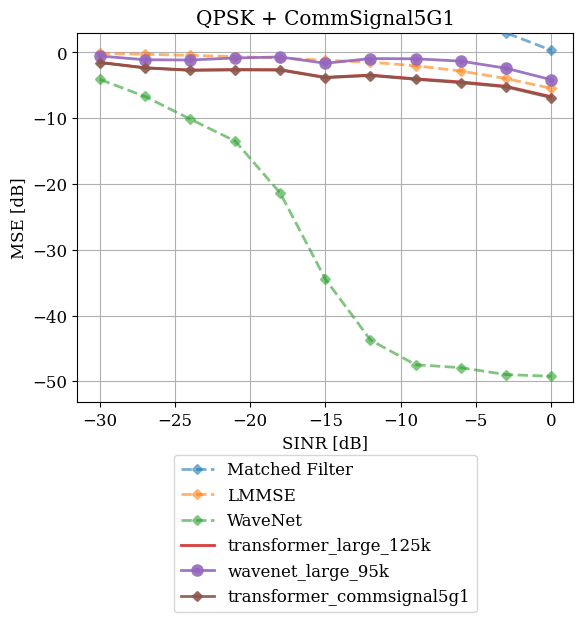

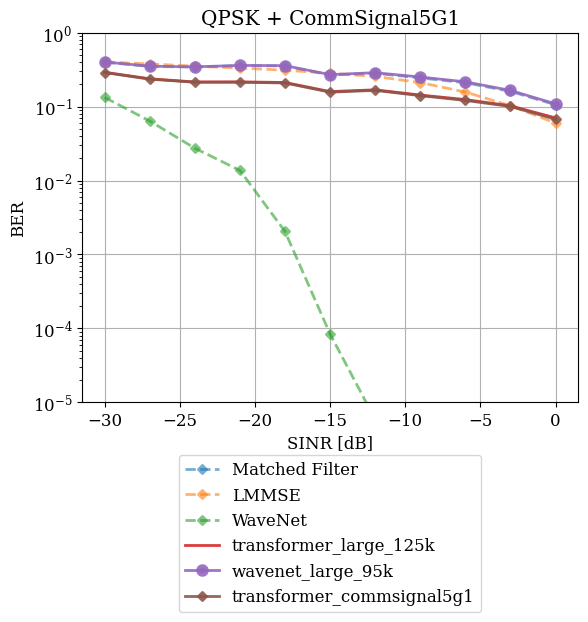

In [3]:
testset_identifier = "TestSet2Mixture"

all_methods_string = [
    # Baseline synchronized methods
    "Default_NoMitigation",
    "Default_LMMSE",
    "Default_Torch_WaveNet",
    # Transformer-based reference methods
    "transformer_large_125k",
    # "transformer_large_130k",
    # "transformer_large_135k",
    # "transformer_large_140k",
    # "transformer_large_145k",
    # "transformer_large_150k",
    # "transformer_large_155k",
    # "transformer_large_160k",
    # "transformer_large_165k",
    # "transformer_large_170k",
    # "transformer_large_175k",
    # "transformer_large_180k",
    "wavenet_large_95k",
    "transformer_commsignal5g1",
]

label_dict = {
    # Baseline synchronized methods
    "Default_NoMitigation": "Matched Filter",
    "Default_LMMSE": "LMMSE",
    "Default_Torch_WaveNet": "WaveNet",
    # Transformer-based reference methods
    "transformer_large_125k": "transformer_large_125k",
    # "transformer_large_130k": "transformer_large_130k",
    # "transformer_large_135k": "transformer_large_135k",
    # "transformer_large_140k": "transformer_large_140k",
    # "transformer_large_145k": "transformer_large_145k",
    # "transformer_large_150k": "transformer_large_150k",
    # "transformer_large_155k": "transformer_large_155k",
    # "transformer_large_160k": "transformer_large_160k",
    # "transformer_large_165k": "transformer_large_165k",
    # "transformer_large_170k": "transformer_large_170k",
    # "transformer_large_175k": "transformer_large_175k",
    # "transformer_large_180k": "transformer_large_180k",
    "wavenet_large_95k": "wavenet_large_95k",
    "transformer_commsignal5g1": "transformer_commsignal5g1",
}

marker_dict = {
    # Baseline synchronized methods
    "Default_NoMitigation": "",
    "Default_LMMSE": "",
    "Default_Torch_WaveNet": "",
    # Transformer-based reference methods
    "transformer_large_125k": "",
    # "transformer_large_130k": "",
    # "transformer_large_135k": "",
    # "transformer_large_140k": "",
    # "transformer_large_145k": "",
    # "transformer_large_150k": "",
    # "transformer_large_155k": "",
    # "transformer_large_160k": "",
    # "transformer_large_165k": "",
    # "transformer_large_170k": "",
    # "transformer_large_175k": "",
    # "transformer_large_180k": "",
    "wavenet_large_95k": "o",
    "transformer_commsignal5g1": "x",
}

if not os.path.exists("/home/tejasj/data2/RF_transformer/eval_outputs/figures"):
    os.makedirs("/home/tejasj/data2/RF_transformer/eval_outputs/figures")

for soi_type in ["QPSK"]:
    for interference_sig_type in ["CommSignal5G1"]:
        mse_to_plot, ber_to_plot = {}, {}
        for id_string in all_methods_string:
            try:
                mse_mean, ber_mean = pickle.load(
                    open(
                        os.path.join(
                            "/home/tejasj/data2/RF_transformer/eval_outputs/ICASSP_baselines",
                            f"{id_string}",
                            f"{id_string}_{testset_identifier}_exports_summary_"
                            f"{soi_type}_{interference_sig_type}.pkl",
                        ),
                        "rb",
                    )
                )
            except FileNotFoundError:
                mse_mean, ber_mean = pickle.load(
                    open(
                        os.path.join(
                            "/home/tejasj/data2/RF_transformer/eval_outputs/synchronized/results",
                            f"{id_string}_{testset_identifier}_exports_summary_"
                            f"{soi_type}_{interference_sig_type}.pkl",
                        ),
                        "rb",
                    )
                )
            mse_to_plot[id_string] = mse_mean
            ber_to_plot[id_string] = ber_mean

        plt.figure()
        for id_str in mse_to_plot.keys():
            marker_style = "x--" if "Default" in id_str else marker_dict[id_str] + "-"
            plt.plot(
                all_sinr,
                mse_to_plot[id_str],
                marker_style,
                label=label_dict[id_str],
                alpha=0.6 if "Default" in id_str else 0.9,
                ms=4,
                mew=5,
                zorder=90,
            )
        plt.legend(loc="upper center", bbox_to_anchor=(0.5, -0.12))
        plt.grid()
        plt.gca().set_ylim(top=3)
        if soi_type == "QPSK" and interference_sig_type == "EMISignal1":
            plt.gca().set_ylim(bottom=-65)
        plt.xlabel("SINR [dB]")
        plt.ylabel("MSE [dB]")
        plt.title(f"{soi_type} + {interference_sig_type}")

        # plt.savefig(
        #     os.path.join(
        #         "/home/tejasj/data2/RF_transformer/eval_outputs/figures",
        #         f"collated_MSE_{soi_type}_{interference_sig_type}_Comparison.png",
        #     ),
        #     dpi=300,
        #     bbox_inches="tight",
        # )

        plt.figure()
        for id_str in ber_to_plot.keys():
            marker_style = "x--" if "Default" in id_str else marker_dict[id_str] + "-"
            plt.semilogy(
                all_sinr,
                ber_to_plot[id_str],
                marker_style,
                label=label_dict[id_str],
                alpha=0.6 if "Default" in id_str else 0.9,
                ms=4,
                mew=5,
                zorder=90,
            )
        plt.legend(loc="upper center", bbox_to_anchor=(0.5, -0.12))
        plt.grid()
        plt.ylim([1e-5, 1])
        plt.xlabel("SINR [dB]")
        plt.ylabel("BER")
        plt.title(f"{soi_type} + {interference_sig_type}")

        # plt.savefig(
        #     os.path.join(
        #         "/home/tejasj/data2/RF_transformer/eval_outputs/figures",
        #         f"collated_BER_{soi_type}_{interference_sig_type}_Comparison.png",
        #     ),
        #     dpi=300,
        #     bbox_inches="tight",
        # )